# Data Mining Group 3
## Members: Moritz Brandl, Lukas Miklautz, Raphael Mitsch


In [4]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys
from dotenv import load_dotenv, find_dotenv

import pandas as pd
import numpy as np

#Visualisation Libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
from datetime import datetime
#####
#
# Default way of appending the src directory in the cookiecutter file structure
#
#####

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

   
# import my method from the source code
%aimport data.download
from data.download import DatasetDownloader
%aimport visualization.visualize
from visualization.visualize import plot_track
%aimport data.preprocessing
from data.preprocessing import Preprocessor

# By loading the dotenv we can access Environment variables setted int the dm_mobility_task/.env file
# e.g. I setted there my token like this: "KEY_LUKAS"=1234, similary there is one for KEY_RAPHAEL and KEY_MORITZ
load_dotenv(find_dotenv())
DatasetDownloader.URL = str(os.environ.get("URL"))
DatasetDownloader.USERNAME = str(os.environ.get("LOGINNAME"))
DatasetDownloader.PASSWORD = str(os.environ.get("LOGINPASSWORD"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
recorded_file_names = DatasetDownloader.get_file_names(os.path.join(DatasetDownloader.get_data_dir(),"raw"))
print("We have recorded: {} trips".format(len(recorded_file_names)))

We have recorded: 61 trips


In [6]:
dfs = Preprocessor.preprocess([os.environ.get("KEY_RAPHAEL"),
                               os.environ.get("KEY_MORITZ"),
                               os.environ.get("KEY_LUKAS")])


{'TRAM': 3, 'WALK': 5, 'METRO': 2}
{'TRAM': 0, 'WALK': 3, 'METRO': 2}
{'TRAM': 4, 'WALK': 5, 'METRO': 3}


Get summaries for each scripted trip:

In [34]:
token = os.environ.get("KEY_RAPHAEL")
trip_info = Preprocessor.get_trip_summaries(dfs[token]["trips"], convert_time=True)

scripted_mask = [True if "scripted" in str(notes).lower() else True for notes in trip_info["notes"]]
trip_info[scripted_mask]

,time,mode,notes,Start,Stop,trip_length
0,2017-12-01 12:34:22.004,WALK,NaN,2017-12-01 12:34:22.255,2017-12-01 13:07:40.943,00:33:18.688000
1,2017-12-10 12:59:26.917,WALK,scripted,2017-12-10 12:59:27.245,2017-12-10 13:10:44.976,00:11:17.731000
2,2017-12-09 20:04:36.073,METRO,scripted,2017-12-09 20:04:36.335,2017-12-09 20:15:55.682,00:11:19.347000
3,2017-12-04 11:25:32.243,TRAM,"40,uni,alsegger",2017-12-04 11:25:32.591,2017-12-04 11:37:53.340,00:12:20.749000
4,2017-12-11 15:42:33.469,WALK,scripted,2017-12-11 15:42:34.507,2017-12-11 15:53:59.586,00:11:25.079000
5,2017-12-07 10:25:09.021,TRAM,scripted,2017-12-07 10:25:09.721,2017-12-07 10:38:16.451,00:13:06.730000
6,2017-12-07 07:09:14.617,TRAM,scripted,2017-12-07 07:09:15.194,2017-12-07 07:26:03.936,00:16:48.742000
7,2017-12-09 12:28:03.318,WALK,scripted,2017-12-09 12:28:03.589,2017-12-09 12:40:43.252,00:12:39.663000
8,2017-12-05 16:46:55.136,TRAM,scripted,2017-12-05 16:46:55.635,2017-12-05 17:00:48.895,00:13:53.260000
9,2017-12-07 10:45:22.798,WALK,scripted,2017-12-07 10:45:24.227,2017-12-07 10:56:37.219,00:11:12.992000


----
## Apply resampling in new time interval for coarser granularity


In [59]:
trips = dfs[token]["trips"]
trip_nr = 14
all_sensors_resampled = Preprocessor.downsample_time_series_per_category(trips[trip_nr]["sensor"],
                                                                         categorical_colnames=["sensor"])


print(all_sensors_resampled.isnull().sum().sum())

#blub = all_sensors_resampled.fillna(method='ffill', limit=100)

#print(all_sensors_resampled)
print(all_sensors_resampled.isnull().sum().sum())
blub = all_sensors_resampled.dropna(axis=0, how='any')
print(blub.isnull().sum().sum())


72
72
0


## Plot acceleration for one trip

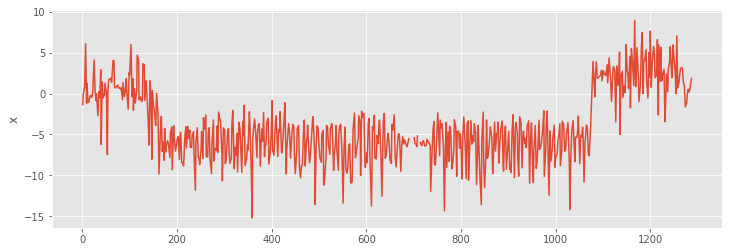

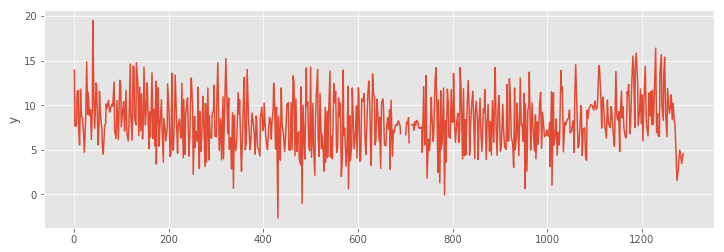

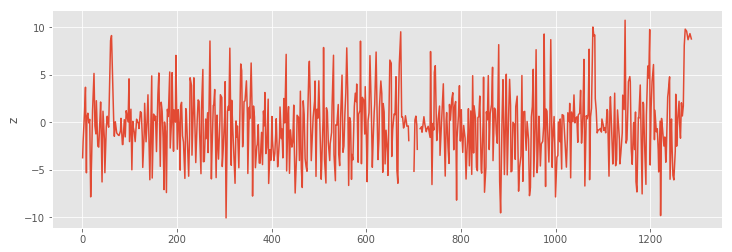

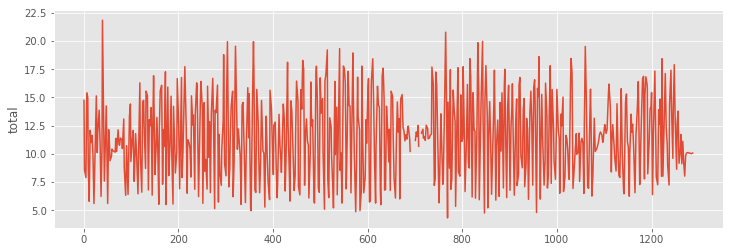

In [29]:
acceleration = all_sensors_resampled[all_sensors_resampled["sensor"] == "acceleration"]
figsize=(12, 4)
acceleration["x"].plot(figsize=figsize);
plt.ylabel("x")
plt.show();

acceleration["y"].plot(figsize=figsize);
plt.ylabel("y")
plt.show();

acceleration["z"].plot(figsize=figsize);
plt.ylabel("z")
plt.show();

acceleration["total"].plot(figsize=figsize);
plt.ylabel("total")
plt.show();

**Plot the gps data on a google map and save it as html to disk:**

In [32]:
trip1_lukas_uni = 1
location_df = trips[trip1_lukas_uni]["location"]
file_name = "gps_test.html"
plot_track(location_df[["longitude", "latitude"]], file_name)

The track can now be viewed at:


In [33]:
os.path.join("reports","maps",file_name)

'reports/maps/gps_test.html'